# **BigMart Sales Prediction**

### **Importing Dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import r2_score

### **Loading Dataset and Data Description**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Datasets/big_mart_data.csv")
df.shape

(8523, 12)

In [3]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


**Categorical Data**

In [7]:
cat_cols = list(df.select_dtypes(include='object').columns)
print(cat_cols)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


### **Data Preprocessing I**

**Handling Missing Values**

In [8]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [9]:
# Using Mean Imputation method for column 'Item_Weight' to fill missing values:
print("Mean value of Item_Weight is: ", df['Item_Weight'].mean())
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

Mean value of Item_Weight is:  12.857645184135976


In [10]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [11]:
# Using Mode Imputation method for column 'Outlet_Size' to fill missing values:
mode_of_outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
mode_of_outlet_size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [12]:
missing_values = df['Outlet_Size'].isnull()
df.loc[missing_values, 'Outlet_Size'] = df.loc[missing_values, 'Outlet_Type'].apply(lambda outlet_type: mode_of_outlet_size[outlet_type])

In [13]:
df.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


### **Data Analysis and Visualization**

In [14]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [15]:
sns.set()

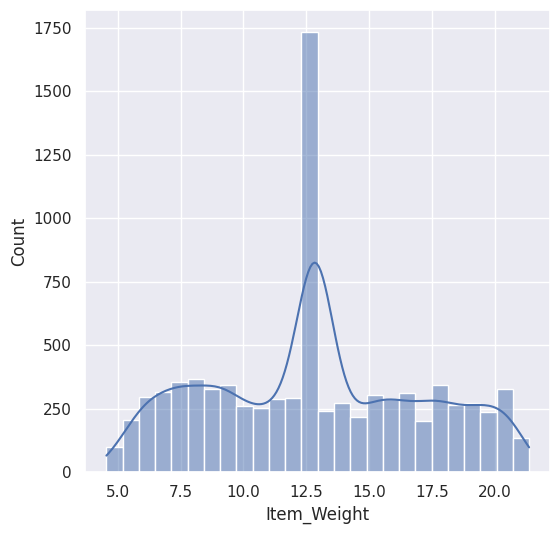

In [16]:
plt.figure(figsize=(6,6))
sns.histplot(df['Item_Weight'], kde=True)
plt.show()

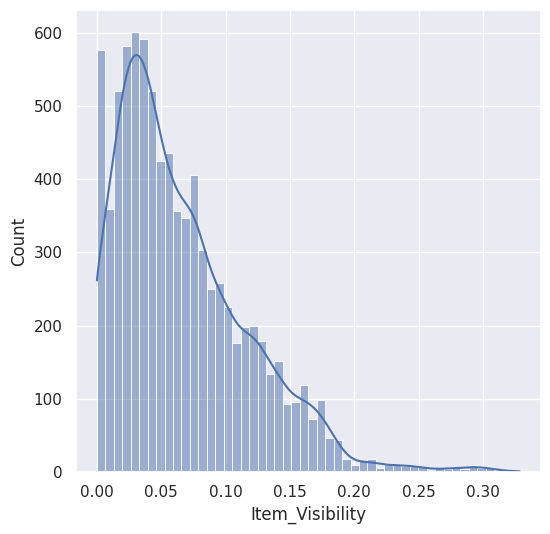

In [17]:
plt.figure(figsize=(6,6))
sns.histplot(df['Item_Visibility'], kde=True)
plt.show()

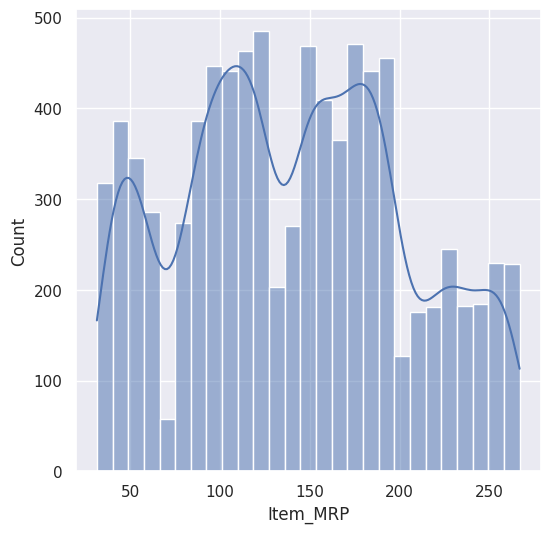

In [18]:
plt.figure(figsize=(6,6))
sns.histplot(df['Item_MRP'], kde=True)
plt.show()

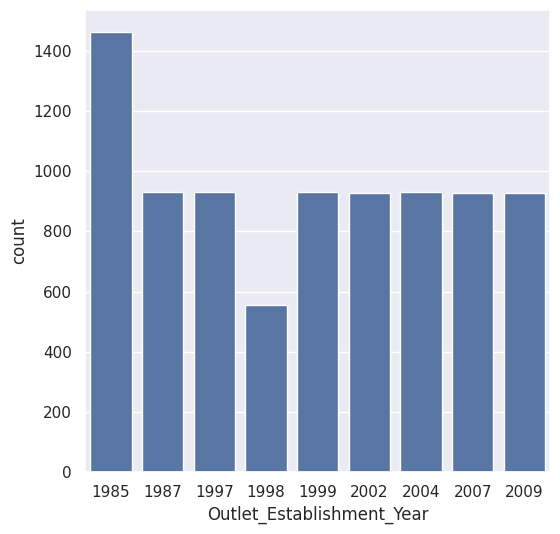

In [19]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['Outlet_Establishment_Year'], data=df)
plt.show()

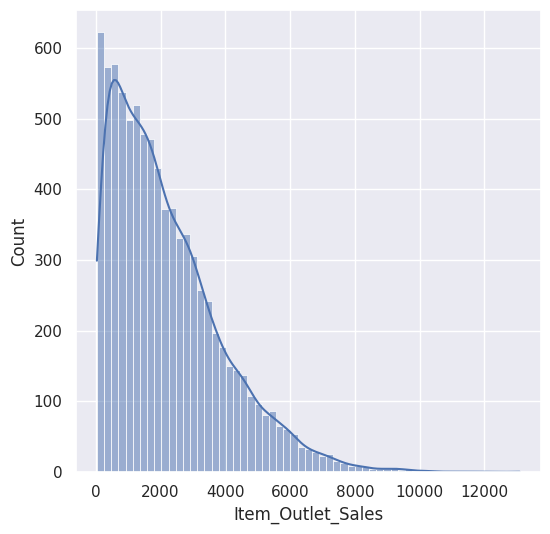

In [20]:
plt.figure(figsize=(6,6))
sns.histplot(df['Item_Outlet_Sales'], kde=True)
plt.show()

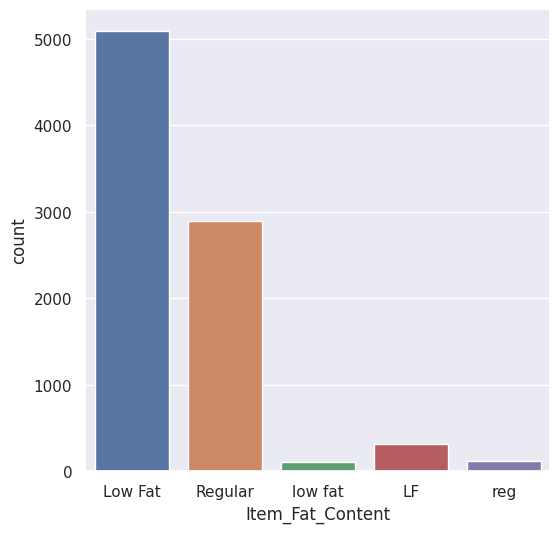

In [21]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df, hue='Item_Fat_Content')
plt.show()

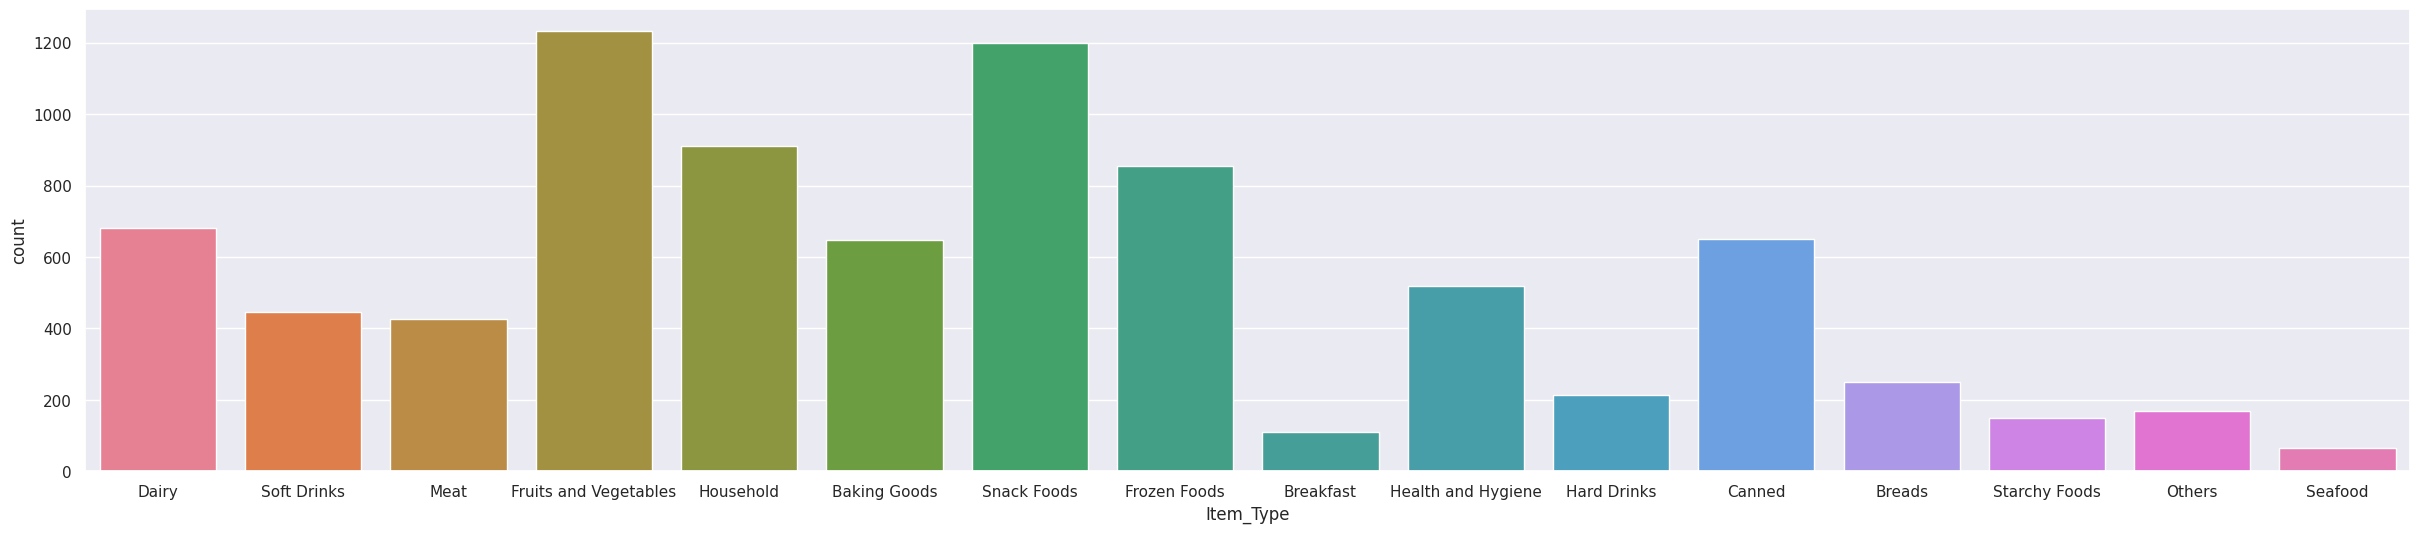

In [22]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df, hue='Item_Type')
plt.show()

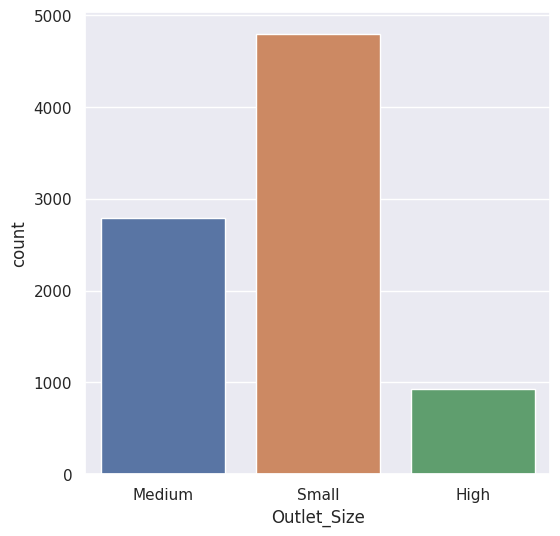

In [23]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df, hue='Outlet_Size')
plt.show()

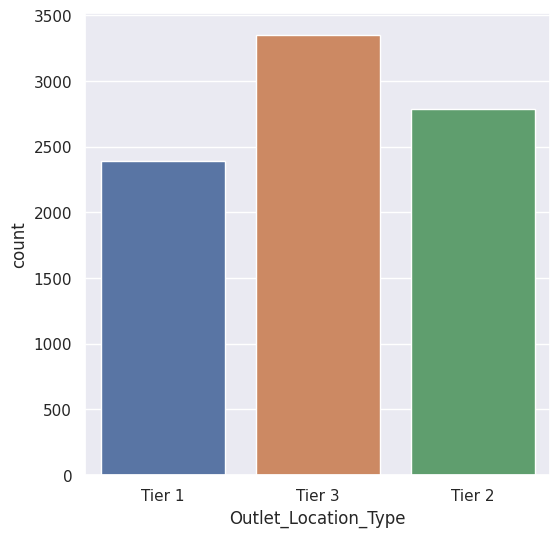

In [24]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=df, hue='Outlet_Location_Type')
plt.show()

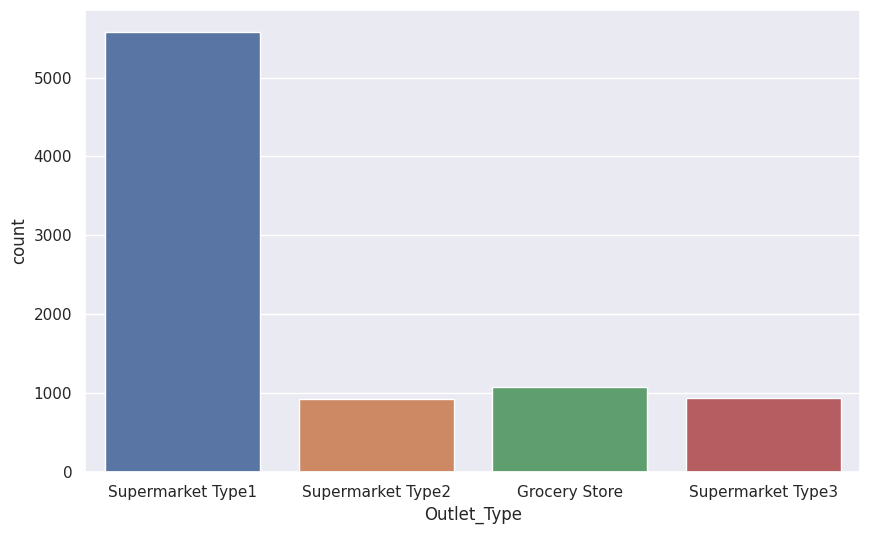

In [25]:
plt.figure(figsize=(10,6))
sns.countplot(x='Outlet_Type', data=df, hue='Outlet_Type')
plt.show()

### **Data Preprocessing II**

In [26]:
df.Item_Fat_Content.value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [27]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})

In [28]:
df.Item_Fat_Content.value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


**Label Encoding**

In [29]:
label_encoder = LabelEncoder()
for col in cat_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


**Splitting Input Features (X) and Output / Target (Y)**

In [31]:
X = df.drop(columns='Item_Outlet_Sales', axis=1)
Y = df['Item_Outlet_Sales']

**Training Testing Dataset Splitting**

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=23)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


### **Model Training and Evaluation**

In [34]:
regressor = XGBRegressor()

In [35]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

**Model Evaluation on Training Dataset**

In [36]:
Y_train_pred = regressor.predict(X_train)
r2_train = r2_score(Y_train, Y_train_pred)
print("R2 Score on Training Dataset: ", r2_train)

R2 Score on Training Dataset:  0.8754108261536891


**Model Evaluation on Testing Dataset**

In [37]:
Y_test_pred = regressor.predict(X_test)
r2_test = r2_score(Y_test, Y_test)
print("R2 Score on Testing Dataset: ", r2_test)

R2 Score on Testing Dataset:  1.0
